# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

The number of the female mice which are used for test are smiliar with male. And the most number of mice are tested for Capomulin and Ramicane.
 
According to the data of mouse I509, the highest tumor volume is occurred around 15-20 days then drop fast.

Mouse weight and average tumor volume has strong positive correlation.

Ketapril has the highest tumor volume.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_result=pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merge_result.head ()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_data=merge_result["Mouse ID"].unique()
mice_number=len(mice_data)
mice_number

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
counts = merge_result.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='counts')
duplicates = counts[counts['counts'] > 1]
mice_dupe_id=duplicates['Mouse ID'].unique()
mice_dupe_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data=merge_result.loc[merge_result["Mouse ID"]==mice_dupe_id[0],:]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mice_data=merge_result.dropna(how="any",subset=["Mouse ID"])
clean_mice_data=new_mice_data.drop_duplicates(subset=["Mouse ID"])
clean_mice_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data["Mouse ID"].count()

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_data=merge_result.set_index("Drug Regimen")
drug_regimen_data

drug_group=drug_regimen_data.groupby(["Drug Regimen"])
drug_group

mean_tumor=drug_group["Tumor Volume (mm3)"].mean()
median_tumor=drug_group["Tumor Volume (mm3)"].median()
tumor_variance=drug_group["Tumor Volume (mm3)"].var()
tumor_std=drug_group["Tumor Volume (mm3)"].std()
tumor_err=drug_group["Tumor Volume (mm3)"].sem()


drug_summary=pd.DataFrame({"Mean Tumor Volume":mean_tumor,"Median Tumor Volume":median_tumor,"Tumor Volume Variance":tumor_variance,
                           "Tumor Volume Std. Dev.":tumor_std,"Tumor Volume Std. Err.":tumor_err})
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_group_agg = drug_regimen_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
drug_group_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

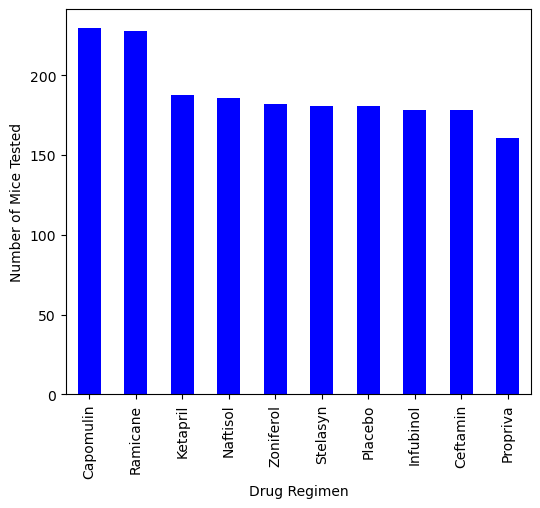

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_timepoint = merge_result[["Drug Regimen","Timepoint"]]
mice_number_drug = drug_timepoint["Drug Regimen"].value_counts()

mice_number_drug.plot(kind="bar",figsize=(6,5), color="blue", xlabel="Drug Regimen", ylabel="Number of Mice Tested")      

plt.show()

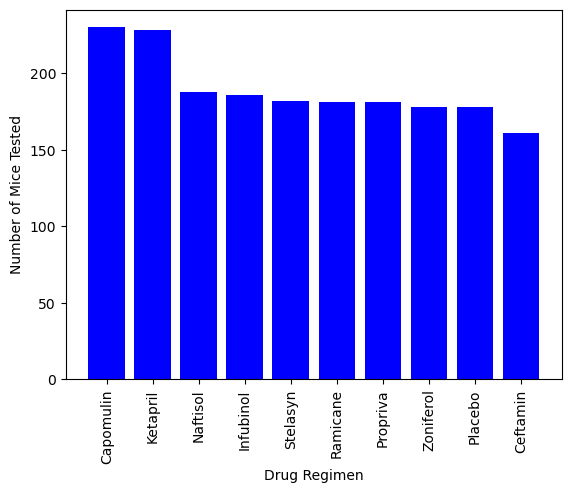

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen=merge_result["Drug Regimen"].unique()
mice_number_drug_py=merge_result["Drug Regimen"].value_counts()

plt.bar(drug_regimen,mice_number_drug_py,color='blue', align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)

plt.show()


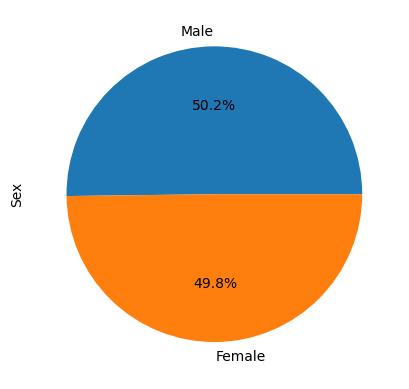

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=clean_mice_data["Sex"].value_counts()
sex=["Male","Female"]

gender.plot(kind="pie",autopct="%1.1f%%", ylabel = "Sex")

plt.show()


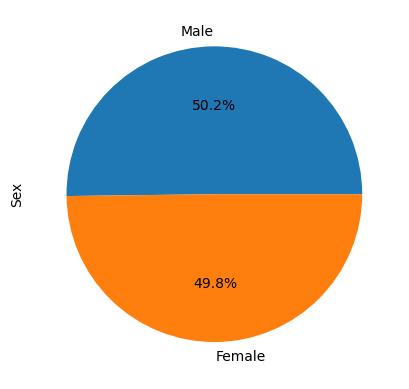

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode=(0,0)

plt.pie(gender,explode=explode,labels=sex,autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_drug_data = merge_result.loc[(merge_result["Drug Regimen"] == "Capomulin") | 
                                         (merge_result["Drug Regimen"] == "Ramicane") |
                                        (merge_result["Drug Regimen"] == "Infubinol") |
                                         (merge_result["Drug Regimen"] == "Ceftamin") ]
final_tumor_volume=four_drug_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].sum()

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=four_drug_data.groupby(["Mouse ID"])["Timepoint"].max()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_timeplot=pd.merge(greatest_timepoint,merge_result, how="left", on=["Mouse ID","Timepoint"])


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_value_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:

    # add subset 
    mice_ea_drug_tum=merge_timeplot.loc[merge_timeplot['Drug Regimen']==drug,'Tumor Volume (mm3)']

    tumor_value_list.append(mice_ea_drug_tum)
    

    # Determine outliers using upper and lower bounds
    
    q1 = mice_ea_drug_tum.quantile(0.25)
    q3 = mice_ea_drug_tum.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = mice_ea_drug_tum[(mice_ea_drug_tum < lower_bound) | (mice_ea_drug_tum > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


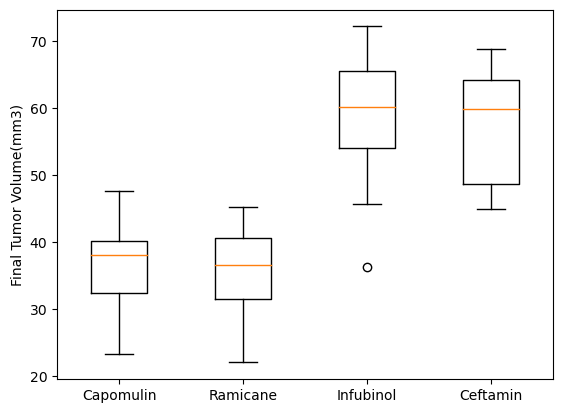

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume(mm3)')
ax1.boxplot(tumor_value_list)
ax1.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

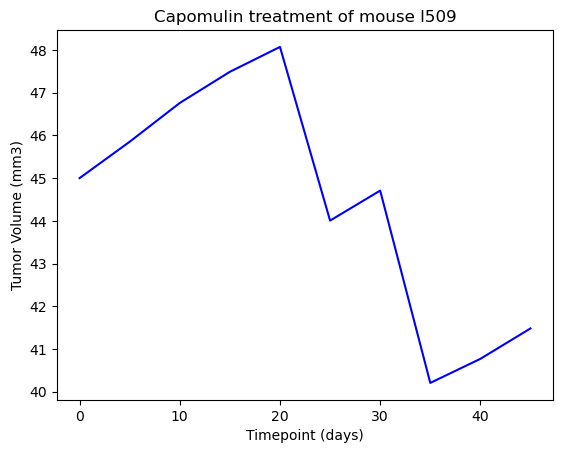

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_line=merge_result.loc[merge_result['Mouse ID']=='l509',:]
capomulin_line_data=capomulin_line.loc[:,["Timepoint","Tumor Volume (mm3)"]]

capomulin_plot=plt.plot(capomulin_line_data["Timepoint"],capomulin_line_data["Tumor Volume (mm3)"],color='blue')
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

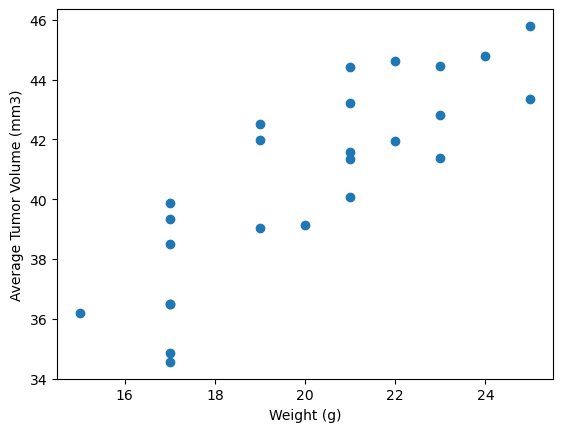

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_scatter=merge_result.loc[merge_result['Drug Regimen']=='Capomulin',:]

group_capomulin_scatter=capomulin_scatter.groupby("Mouse ID")

avg_tumor=group_capomulin_scatter[("Tumor Volume (mm3)")].mean()
weight=group_capomulin_scatter["Weight (g)"].mean()

plt.scatter(weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


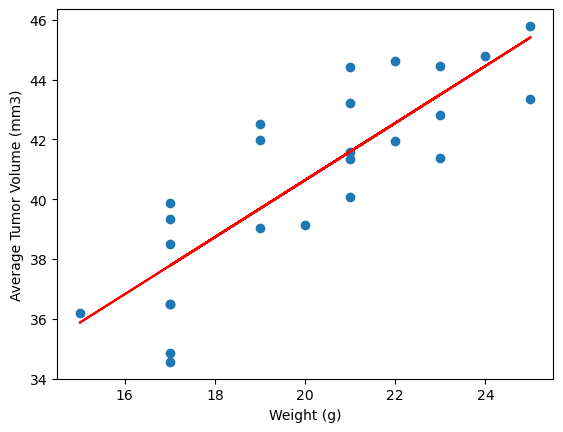

In [19]:
# Calculate the correlation coefficient and linear regression model

correlation=st.pearsonr(weight,avg_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,avg_tumor)
regress_values = slope * weight + intercept


plt.scatter(weight,avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(weight,regress_values,"r-")

plt.show()